# AdaBoost

## Данные

Источник данных: https://archive.ics.uci.edu/ml/datasets/Mushroom


Эти данные содержат описание гипотетических примеров для 23 видов грибов из семейства шампиньоновых (стр. 500-525). Каждый вид характеризуется либо как съедобный, либо как ядовитый, либо неизвестной съедобности (не рекомендуется в пищу). Этот последний класс был объединён с классом ядовитых. Источник явно пишет, что не существует простого правила для определения съедобности гриба.


Информация об атрибутах:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<font color='orange'>Задача:</font>

В данной задачи построение предиктивной модели не является основной задачей. Таким образом перед нами стоит вопрос, можем ли применить машинное обучение для предсказания съедобности гриба и возможности создавать предупреждающие советы для грибников.


## <font color='orange'>Загружаем библиотеки</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# <font color='orange'> Исследование данных - EDA </font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Все данные являются категориальными, поэтому будем исследовать насколько сбалансированы данные

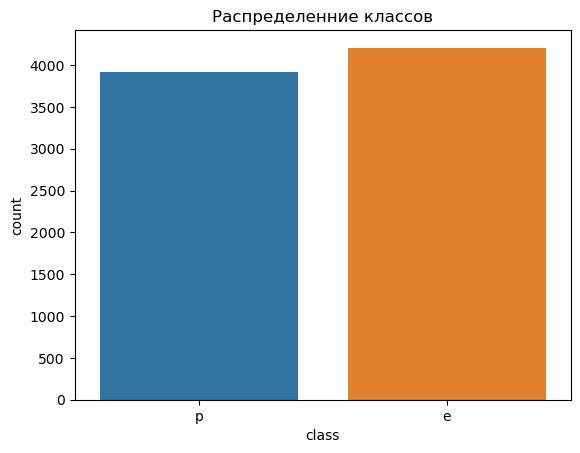

In [5]:
sns.countplot(data = df, x = 'class').set_title('Распределенние классов');

Отмечаем, что классы практически идеально сбалансированы

In [6]:
#Проверим количество уникальных значений для каждого параметра

df.nunique().sort_values()

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

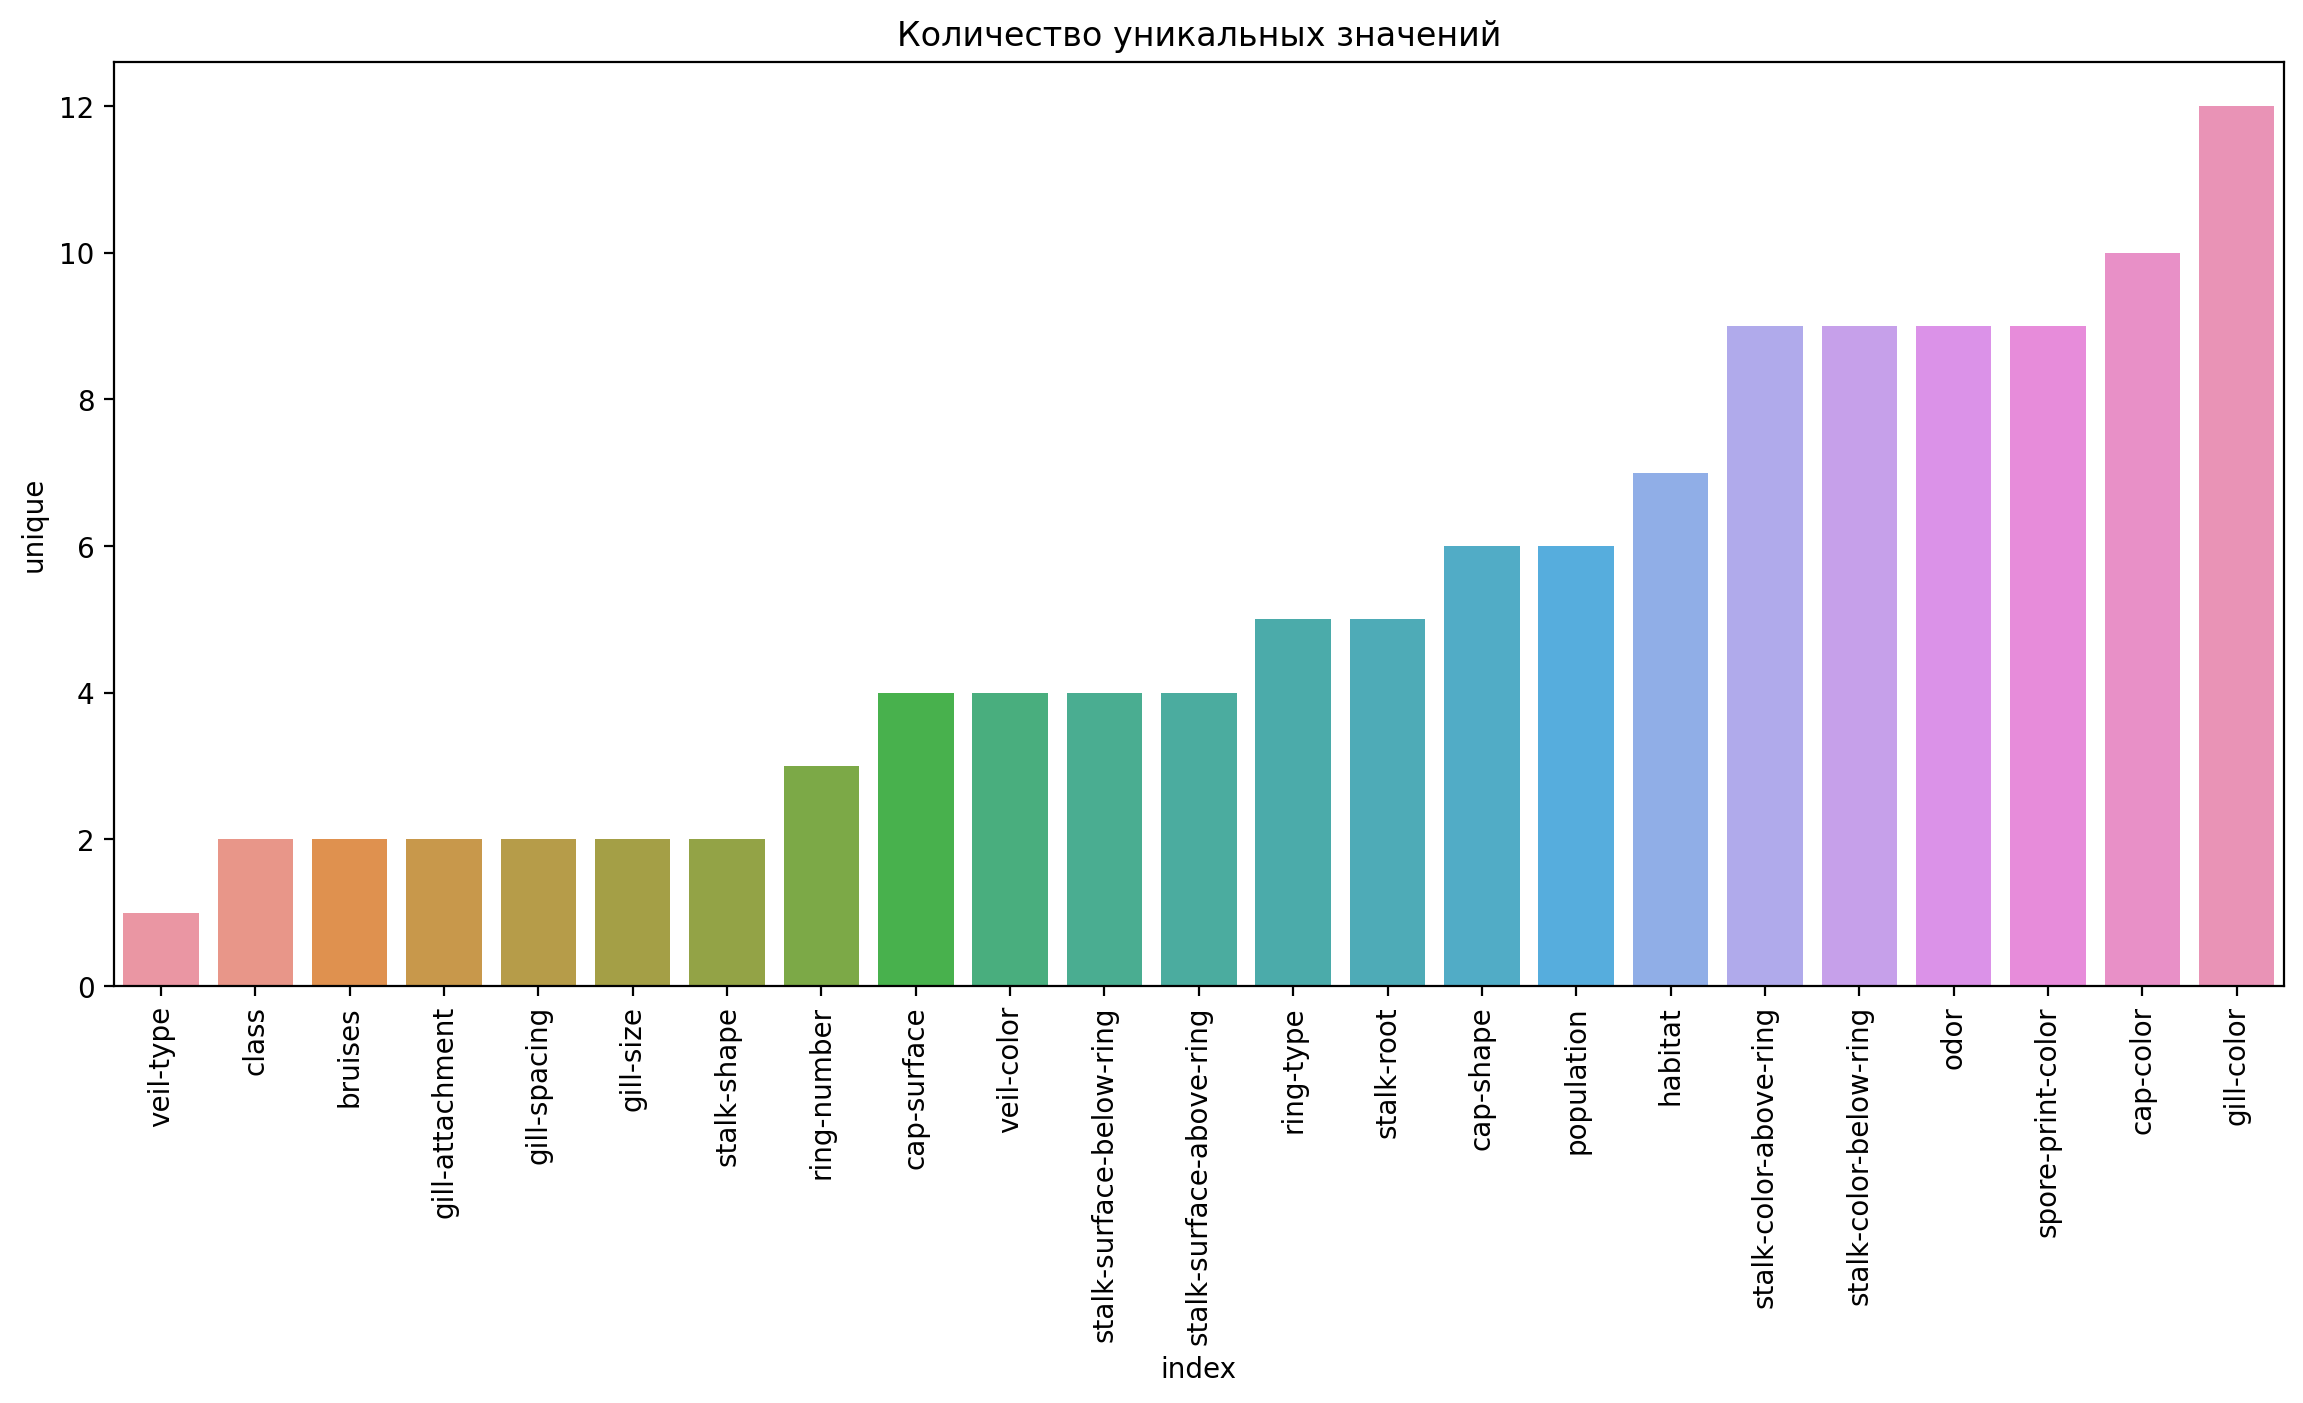

In [7]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90)
plt.title('Количество уникальных значений');

Если перед нами стоит задача создать рекомендацию для грибников, то нужно учесть атрибуты, у которых наименьшее количество уникальных признаков, так как различить 12 цветов для некоторых может быть достаточно сложно

# <font color='green'> AdaBoosting </font>

# <font color='orange'> Обучение модели </font>

### Подготовка данных

In [8]:
#Отделим целевую переменную от остальных атрибутов
X = df.drop('class',axis=1)

#Преобразование в дамми-переменные
X = pd.get_dummies(X,drop_first=True)

#Выделим целевую переменную
y = df['class']

#Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)



### Создание модели

In [9]:
model = AdaBoostClassifier(n_estimators=1)

#Модель выбирает 1 наилучший признак, по которому выполняет разбиение

In [10]:
#Обучение модели
model.fit(X_train, y_train)

#Предсказание модели
predictions = model.predict(X_test)

#Выводим отчет
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



На данный момент в нашей модели есть всего 1 простейшее дерево с 1 узлорм разбиения данных по 1 признаку, и даже уже оно дает впечатляющие результаты.

Определеним, по какому признаку произошло разбиение

In [11]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Обращаем внимание, что среди нулей у нас всего одна единица, которая и является определяющим атрибутом. Чтобы определить, что это за атрибут, определим индекс.

In [12]:
#Выводим индекс максмального элемента

model.feature_importances_.argmax()

22

In [13]:
X.columns[22]

'odor_n'

Согласно приведенному выше описанию, это признак отсутсвия запаха у гриба. То есть, если мы хотим определить, съедобен гриб или нет, лучше всего просто понюхать гриб.

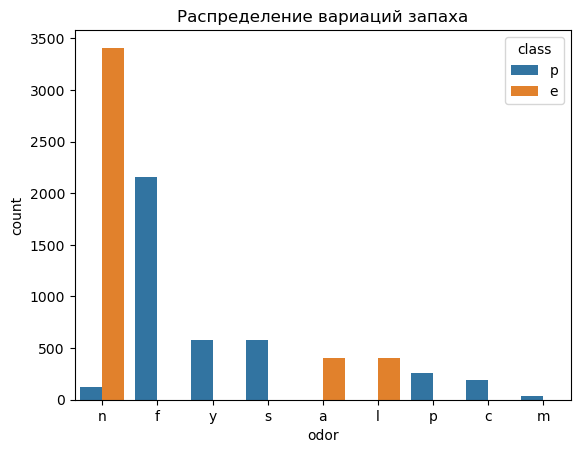

In [14]:
sns.countplot(data = df, x = 'odor'
             , order = df['odor'].value_counts().index
              , hue='class').set_title('Распределение вариаций запаха');

Видим, что большинство грибов, не имеющих запаха, являются съедобными. В связи  с этим нашей первой рекомендацией будет "Понюхайте гриб"

### Улучшение модели

Позволим модели использовать более одного признака

In [15]:
#Определим количество признаков
len(X.columns)

95

Создадим цикл, который позволит визуализировать, при каком количестве деревьев значение ошибки нашей модели выходит на плато

In [16]:
#Создаем переменную для списка
error_rates = []

for n in range(1,96):
    
    #Создаем модель
    model = AdaBoostClassifier(n_estimators=n) 
    #Обучаем модель
    model.fit(X_train,y_train) 
    #Создаем предсказание
    preds = model.predict(X_test)
    #Вычисляем ошибку
    err = 1 - accuracy_score(y_test,preds) 
    
    #Добавляем значение в список
    error_rates.append(err) 

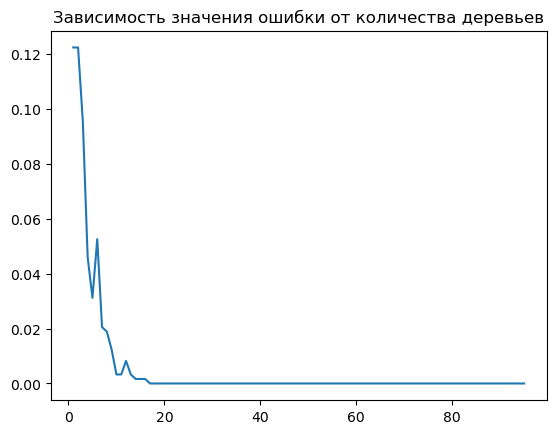

In [17]:
plt.plot(range(1,96),error_rates)
plt.title('Зависимость значения ошибки от количества деревьев');

Видим, что в в после 20 деревьев значение ошибки выходит на плато

Однако помним, что при добавлении дополнительных деревьев, будут меняться веса каждого признака, поэтому нам нужно заново определить порядок рекомендаций для грибников

In [18]:
feats = pd.DataFrame(index=X.columns
                     ,data=model.feature_importances_
                     ,columns=['Importance'])
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [19]:
#Выберем признаки, где важность больше нуля
imp_feats = feats[feats['Importance']>0]
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


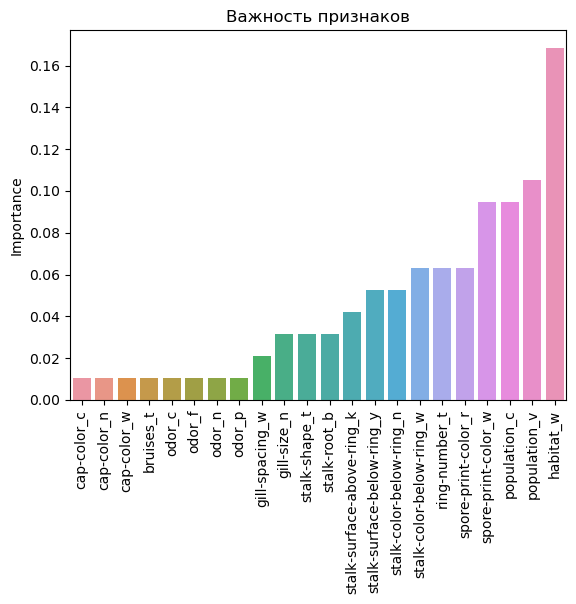

In [20]:
#Визуализируем важность
sns.barplot(data = imp_feats.sort_values('Importance')
            , x = imp_feats.index
           , y = 'Importance')
plt.xticks(rotation=90)
plt.title('Важность признаков');

### Вывод
При определение съедобности гриба определяем внимание на следующие параметры:
- произростает у деревьев
- произростает небольшими колониями или кластерами
- цвет споровика белый или зеленый
- имеет две юбки
- цвет стебля белый 


# <font color='green'> GradientBoosting </font>

# <font color='orange'> Обучение модели </font>

### Подготовка данных

In [21]:
#Отделим целевую переменную от остальных атрибутов
X_g = df.drop('class',axis=1)

#Преобразование в дамми-переменные
X_g = pd.get_dummies(X_g,drop_first=True)

#Выделим целевую переменную
y_g = df['class']

#Разделим данные на обучающий и тестовый наборы
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, test_size=0.15, random_state=101)



### Создание модели

In [22]:
#Создадим сетку
param_grid = {"n_estimators":[1,5,10,20,40,100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth':[3,4,5,6]}

#Создаем модель
model = GradientBoostingClassifier()

#Создаем сетку
grid = GridSearchCV(model, param_grid)

#Обучение модели
grid.fit(X_train_g, y_train_g)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [23]:
grid.best_estimator_

GradientBoostingClassifier()

In [24]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [25]:
#Предсказание
predictions = grid.predict(X_test_g)

predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [26]:
print(classification_report(y_test_g, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



Получили идеальный результат

In [27]:
#Посмотри на важность признаков
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.07826882e-16, 0.00000000e+00, 0.00000000e+00,
       9.28846625e-17, 1.04524302e-03, 1.18312069e-05, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.04199588e-17, 0.00000000e+00, 0.00000000e+00, 1.60530529e-06,
       2.42138379e-03, 5.17905679e-02, 1.84253604e-04, 2.09902229e-02,
       1.82499853e-02, 3.53792740e-03, 6.14744334e-01, 5.61116517e-03,
       0.00000000e+00, 0.00000000e+00, 6.72870855e-18, 1.28013822e-02,
       1.10123251e-02, 0.00000000e+00, 1.87672485e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.87048776e-18,
       1.29091288e-16, 0.00000000e+00, 1.55255278e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.35970145e-01, 3.02822984e-03,
       2.18936437e-02, 4.64723214e-04, 1.99842262e-03, 4.95063766e-06,
       1.83319493e-05, 2.53703491e-04, 4.62718554e-02, 2.56531917e-04,
       0.00000000e+00, 0.00000000e+00, 1.57791758e-03, 0.00000000e+00,
      

In [28]:
#Провизуализируем полученные данные
feat_import = grid.best_estimator_.feature_importances_

imp_feat = pd.DataFrame(index = X_g.columns,
                       data = feat_import,
                       columns = ['Важность'])
imp_feat

,Важность
cap-shape_c,2.911502e-04
cap-shape_f,1.078269e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.288466e-17
...,...
habitat_l,0.000000e+00
habitat_m,3.564796e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [29]:
#Отбросим слишком маленькие значения
imp_feat = imp_feat[imp_feat['Важность']>0.0005]

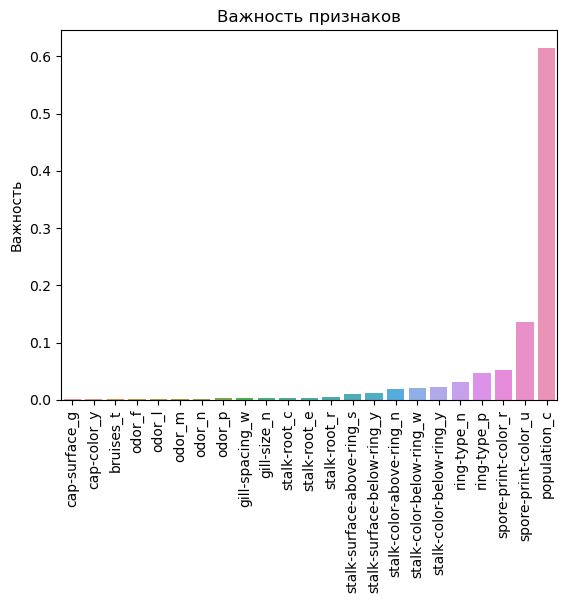

In [30]:
#Визуализируем важность
sns.barplot(data = imp_feat.sort_values('Важность')
            , x = imp_feat.index
           , y = 'Важность')
plt.xticks(rotation=90)
plt.title('Важность признаков');

### Вывод
При определение съедобности гриба методом GradientBoosting определяем внимание на следующие параметры:
- кластерная популяция
- цвет споровика фиолетовый, зеленый или шоколадный

